# DATA EXPLORATION

NOTE: io data exploration la farei solo del training perche in teoria il test non andrebbe mai guardato

## 0 - IMPORTS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np
from collections import Counter
import nltk

## 1 - LOAD DATA

from Chris Zanoli

In [2]:
# Path that contains the data
DATA_PATH = "../data/raw/"

# SMALL or FULL
DATASET_TYPE = "SMALL"

# File names
train_files = {
        "FULL": ["train_pos_full.txt", "train_neg_full.txt"],
        "SMALL": ["train_pos.txt", "train_neg.txt"],
        }
def load_training_data(file_path, dataset_type):
    
    if dataset_type not in train_files.keys():
        raise ValueError(f"Invalid training dataset_type. Expected one of {list(train_files.keys())}")
    
    df = pd.DataFrame()
    for file in train_files[dataset_type]:
        label = "positive" if "pos" in file else "negative" if "neg" in file else None
        with open(file_path + file, 'r', encoding='utf-8') as file:
            tweets = file.readlines()
        tmp_df = pd.DataFrame(tweets, columns=["tweet"])
        tmp_df["label"] = label
        df = pd.concat([df, tmp_df], ignore_index=True)
    
    return df
train_df = load_training_data(DATA_PATH, "SMALL")

## 2 - BASIC DATA EXPLORATION

In [3]:
# basic info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweet   200000 non-null  object
 1   label   200000 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


observation: all non null

In [4]:
# first rows
train_df.head()

,tweet,label
0,<user> i dunno justin read my mention or not ....,positive
1,"because your logic is so dumb , i won't even c...",positive
2,""" <user> just put casper in a box ! "" looved t...",positive
3,<user> <user> thanks sir > > don't trip lil ma...,positive
4,visiting my brother tmr is the bestest birthda...,positive


In [5]:
#  statistics
train_df.describe(include='all')

,tweet,label
count,200000,200000
unique,181307,2
top,i love our fans ! there all so beautiful ! x <...,positive
freq,1536,100000


observation: there are some duplicates

In [6]:
# label distrib
train_df['label'].value_counts()


label
positive    100000
negative    100000
Name: count, dtype: int64

observation: dataset is perfectly balanced

## 3 - CONFLICTS

In [7]:
#duplicate tweets
duplicate_tweets = train_df.duplicated(subset='tweet', keep=False).sum()
total_tweets = train_df['tweet'].count()
print(duplicate_tweets*100/total_tweets,'% are duplicate tweets')

# tweets with the same content but different labels
same_content_diff_labels = train_df[train_df.duplicated(subset='tweet', keep=False)]
same_content_diff_labels_count = same_content_diff_labels.groupby('tweet').filter(lambda x: x['label'].nunique() > 1).shape[0]
print(same_content_diff_labels_count*100/total_tweets,'% have conflicting labels')

13.3015 % are duplicate tweets
0.105 % have conflicting labels


NOTE: both of these conflicts should be eliminated

## 4 - TWEET LENGTH

IDEA: tweet length potrebbe essere un fattore significativo?

In [8]:
# add a column
train_df['tweet_length'] = train_df['tweet'].apply(len)

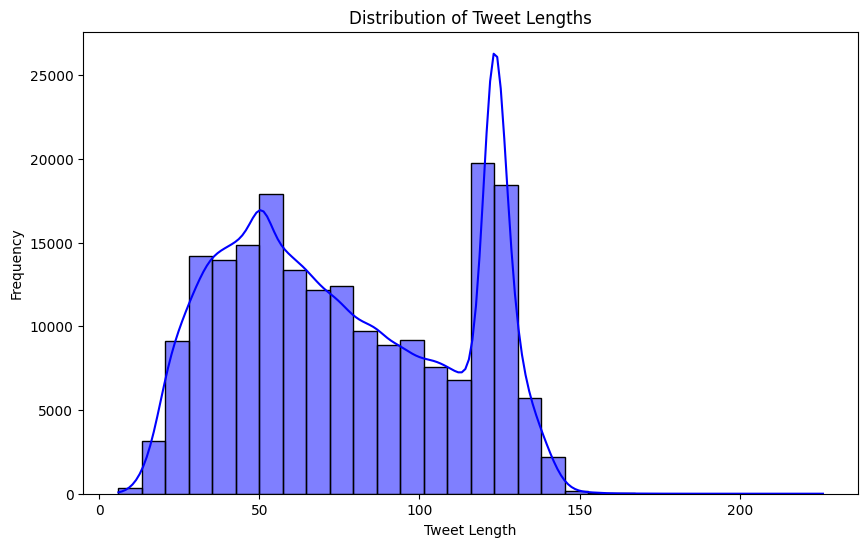

In [9]:
# visualize
plt.figure(figsize=(10, 6))
sns.histplot(train_df['tweet_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


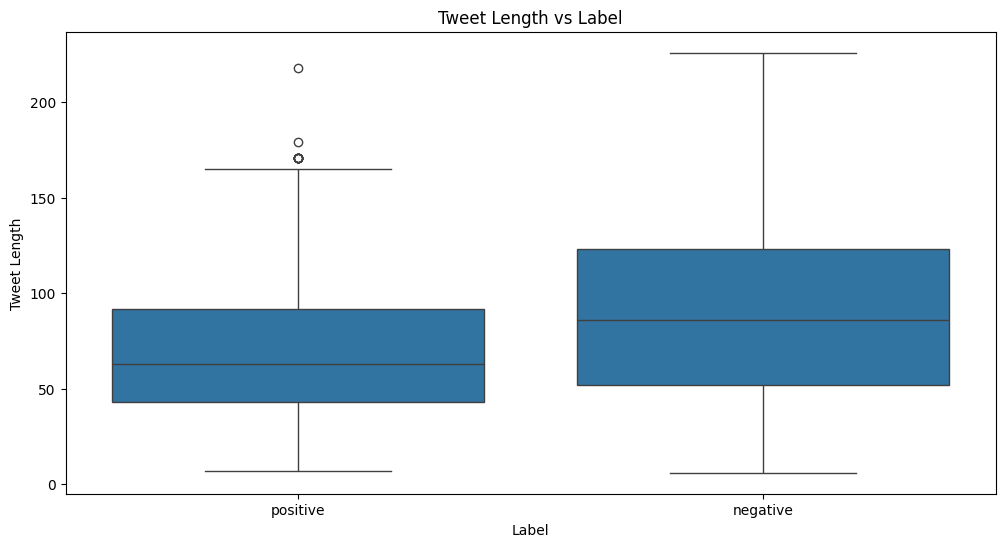

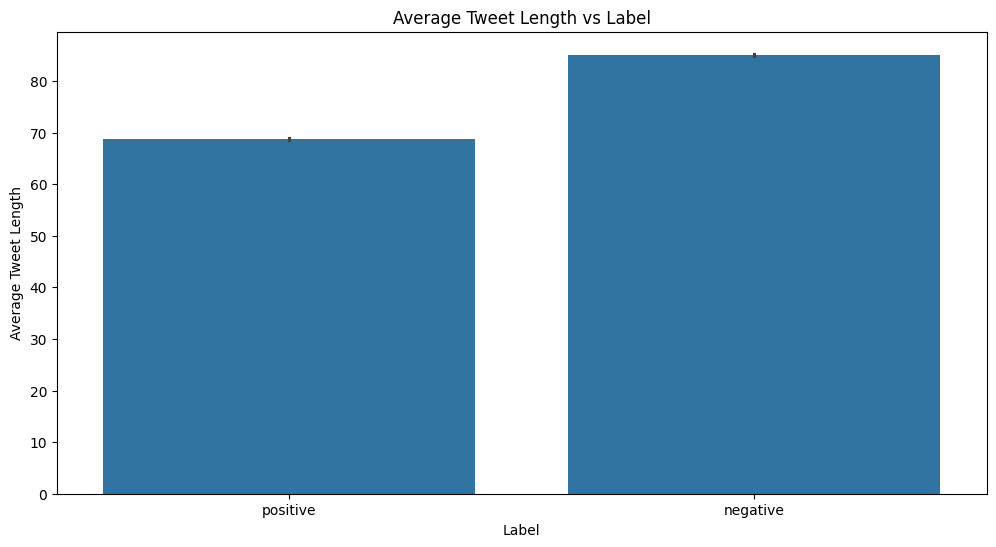

In [10]:
# tweet length against label
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='tweet_length', data=train_df)
plt.title('Tweet Length vs Label')
plt.xlabel('Label')
plt.ylabel('Tweet Length')
plt.show()

# Visualization for tweet length means
plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='tweet_length', data=train_df, estimator=np.mean)
plt.title('Average Tweet Length vs Label')
plt.xlabel('Label')
plt.ylabel('Average Tweet Length')
plt.show()


## 5 - HASHTAG NUMBER

IDEA: tweet length potrebbe essere un fattore significativo?

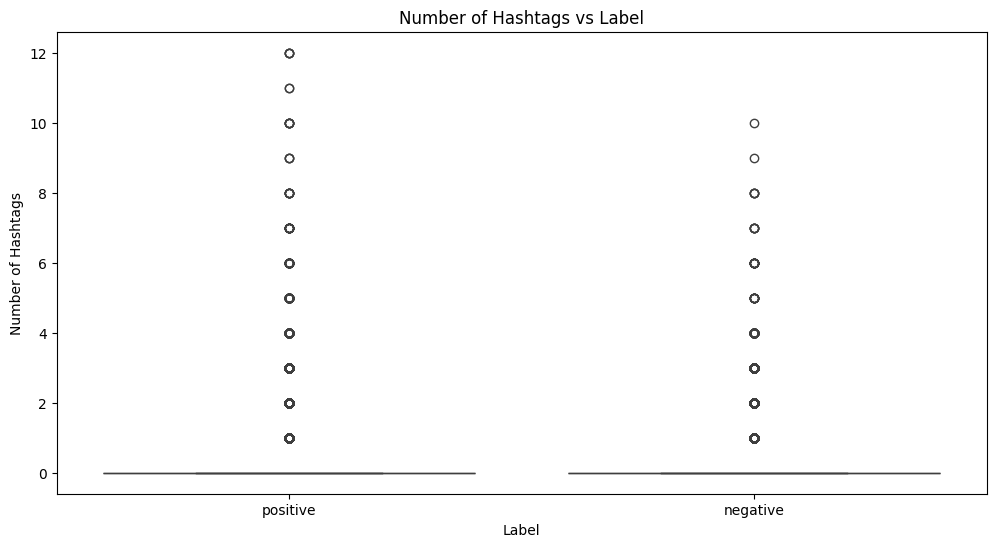

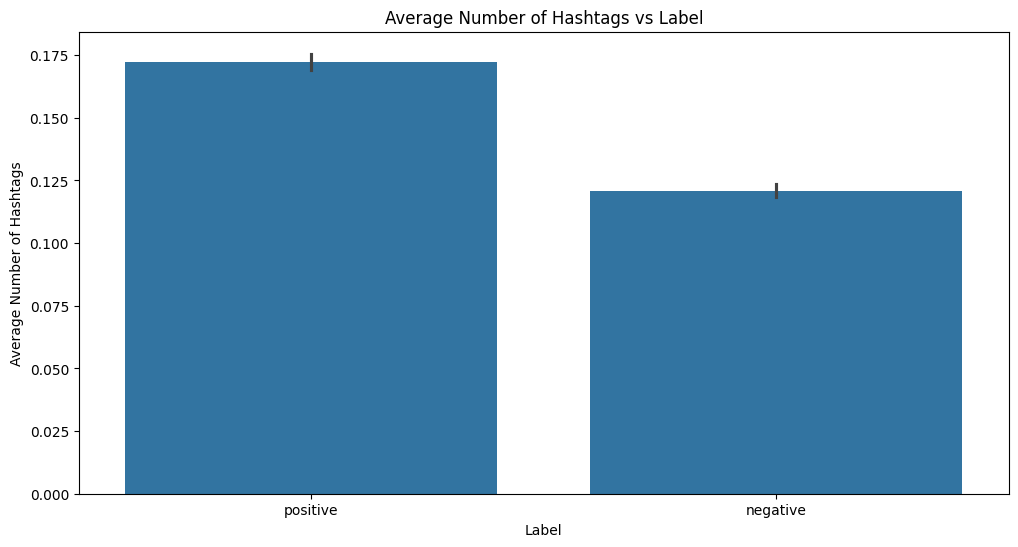

In [11]:
# add a column
train_df['num_hashtags'] = train_df['tweet'].apply(lambda x: x.count('#'))

# Plot number of hashtags against label
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='num_hashtags', data=train_df)
plt.title('Number of Hashtags vs Label')
plt.xlabel('Label')
plt.ylabel('Number of Hashtags')
plt.show()

# Visualization for number of hashtags means
plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='num_hashtags', data=train_df, estimator=np.mean)
plt.title('Average Number of Hashtags vs Label')
plt.xlabel('Label')
plt.ylabel('Average Number of Hashtags')
plt.show()


## 6 - MOST COMMON WORDS

In [12]:
# most common words for each label
nltk.download('punkt')
def get_word_freq(tweets):
    words = []
    for tweet in tweets:
        words.extend(nltk.word_tokenize(tweet))
    return Counter(words)

positive_tweets = train_df[train_df['label'] == 'positive']['tweet']
negative_tweets = train_df[train_df['label'] == 'negative']['tweet']

positive_word_freq = get_word_freq(positive_tweets)
negative_word_freq = get_word_freq(negative_tweets)

print("Most common words in positive tweets:")
print(positive_word_freq.most_common(10))
print("\nMost common words in negative tweets:")
print(negative_word_freq.most_common(10))


[nltk_data] Downloading package punkt to /Users/neo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most common words in positive tweets:
[('<', 95026), ('>', 93149), ('user', 81660), ('!', 52891), ('i', 47945), ('you', 34344), ('.', 30368), ('to', 27408), (',', 27167), ('the', 25747)]

Most common words in negative tweets:
[('<', 83245), ('>', 82054), ('i', 52288), ('user', 46358), ('(', 44330), ('the', 34739), ('url', 34311), ('...', 33139), (',', 32525), ('!', 30183)]


observation: these statistics are not relevant